# Simple How-to Explaining Phantoms

Demonstrate simple basic custom phantom and sinogram generation with XDesign.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from xdesign import *

## Phantom creation

Create various `Phantoms` and assign attenuation `values` to each.

In [2]:
head = Phantom(geometry=Circle(Point([0.5, 0.5]), radius=0.5))
head.material = SimpleMaterial(mass_attenuation=1.0)
print('Head looks like this: {}\n'.format(repr(head)))

eyeL = Phantom(geometry=Circle(Point([0.3, 0.5]), radius=0.1))
eyeL.material = SimpleMaterial(mass_attenuation=1.0)
print('Left eye looks like this: {}\n'.format(repr(eyeL)))

eyeR = Phantom(geometry=Circle(Point([0.7, 0.5]), radius=0.1))
eyeR.material = SimpleMaterial(mass_attenuation=1.0)
print('Right eye looks like this: {}\n'.format(repr(eyeR)))

mouth = Phantom(geometry=Triangle(Point([0.2, 0.7]), Point([0.5, 0.8]), Point([0.8, 0.7])))
mouth.material = SimpleMaterial(mass_attenuation=-1.0)
print('Mouth looks like this: {}\n'.format(repr(mouth)))

Head looks like this: Phantom(geometry=Circle(center=Point([0.5, 0.5]), radius=0.5), children=[], material=SimpleMaterial(mass_attenuation=1.0))

Left eye looks like this: Phantom(geometry=Circle(center=Point([0.29999999999999999, 0.5]), radius=0.1), children=[], material=SimpleMaterial(mass_attenuation=1.0))

Right eye looks like this: Phantom(geometry=Circle(center=Point([0.69999999999999996, 0.5]), radius=0.1), children=[], material=SimpleMaterial(mass_attenuation=1.0))

Mouth looks like this: Phantom(geometry=Triangle(Point([0.20000000000000001, 0.69999999999999996]), Point([0.5, 0.80000000000000004]), Point([0.80000000000000004, 0.69999999999999996])), children=[], material=SimpleMaterial(mass_attenuation=-1.0))



Collect the phantoms together by making the eyes and mouth children of the head `Phantom`.

In [3]:
head.append(eyeL)
head.append(eyeR)
head.append(mouth)
print('Head looks like this: {}\n'.format(repr(head)))

Head looks like this: Phantom(geometry=Circle(center=Point([0.5, 0.5]), radius=0.5), children=[Phantom(geometry=Circle(center=Point([0.29999999999999999, 0.5]), radius=0.1), children=[], material=SimpleMaterial(mass_attenuation=1.0)), Phantom(geometry=Circle(center=Point([0.69999999999999996, 0.5]), radius=0.1), children=[], material=SimpleMaterial(mass_attenuation=1.0)), Phantom(geometry=Triangle(Point([0.20000000000000001, 0.69999999999999996]), Point([0.5, 0.80000000000000004]), Point([0.80000000000000004, 0.69999999999999996])), children=[], material=SimpleMaterial(mass_attenuation=-1.0))], material=SimpleMaterial(mass_attenuation=1.0))



## Viewing phantom geometry and properties

Plot the `Phantom` geometry and properties with a colorbar.

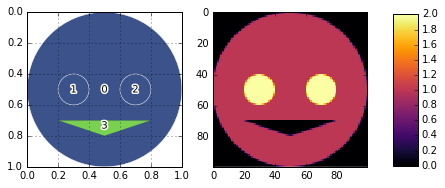

In [4]:
fig = plt.figure(figsize=(7, 3), dpi=600)

# plot geometry
axis = fig.add_subplot(121, aspect='equal')
plt.grid('on')
plt.gca().invert_yaxis()
plot_phantom(head, axis=axis, labels=False)

# plot property
plt.subplot(1, 2, 2)
im = plt.imshow(discrete_phantom(head, 100, prop='mass_attenuation'), interpolation='none', cmap=plt.cm.inferno)

# plot colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.16, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

# save the figure
plt.savefig('Shepp_sidebyside.png', dpi=600,
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=0.0,
        frameon=False)
plt.show()

## Simulate data acquisition

Simulate data acquisition for parallel beam around 180 degrees.

In [5]:
sx, sy = 100, 100
sino, prb = sinogram(sx, sy, head)

Plot the sinogram.

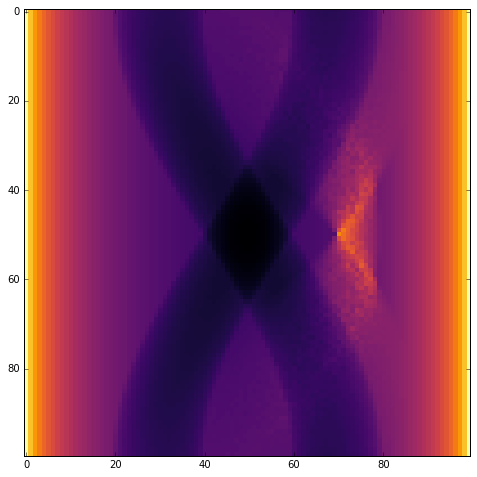

In [6]:
plt.figure(figsize=(8, 8))
plt.imshow(np.reshape(sino, (sx, sy)), cmap='inferno', interpolation='nearest')
plt.savefig('Shepp_sinogram.png', dpi=600,
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=0.0,
        frameon=False)
plt.show()